In [2]:
# for manipulations
import numpy as np
import pandas as pd


#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for interactivity
from ipywidgets import interact

import warnings 
warnings.filterwarnings("ignore") 

In [3]:
# lets read the dataset
data = pd.read_csv('Crop_recommendation.csv')

In [4]:
print("Shape of the dataset: ",data.shape)

Shape of the dataset:  (2200, 10)


In [5]:
data.head(10)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,NaN,NaN
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,NaN,NaN
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,NaN,NaN
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,NaN,NaN
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,NaN,NaN


In [6]:
# To delete a particular column
data.drop('Unnamed: 8', inplace=True, axis=1)

In [7]:
data.drop('Unnamed: 9', inplace=True, axis=1)

In [8]:
data.duplicated().sum()

0

In [9]:
data.head(10)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [10]:
# To check the missing value in a dataset
data.isnull().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
# if we are having NULL then we will use fill NA in this we fill the values with mean(Numerical data) meadian(outliers) and mode(categorical data)

In [12]:
data.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
# lets check the crop present in  this dataset
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<font size="6"> Checking Outliers</font>

In [14]:
fig=px.box(data, y='Nitrogen', points="all")
fig.show()

In [15]:
fig=px.box(data, y='phosphorus', points="all")
fig.show()

In [16]:
fig=px.box(data, y='potassium', points="all")
fig.show()

In [17]:
fig=px.box(data, y='temperature', points="all")
fig.show()

In [18]:
fig=px.box(data, y='humidity', points="all")
fig.show()

In [19]:
fig=px.box(data, y='ph', points="all")
fig.show()

In [20]:
fig=px.box(data, y='rainfall', points="all")
fig.show()

In [21]:
## Detect and Remove Outliers

In [22]:
outliers=data
outliers.columns=outliers.columns
outliers.head()

'''DETECTION'''
# IQR
Q1=np.percentile(outliers['potassium'],25,interpolation='midpoint')
Q3=np.percentile(outliers['potassium'],75,interpolation='midpoint')

IQR=Q3-Q1

print("old space:",outliers.shape)

#Upper Bound
upper=np.where(outliers['potassium']>=(Q3+1.5*IQR))
#Lower Bound
lower=np.where(outliers['potassium']<=(Q1-1.5*IQR))

'''Removing Outliers'''

outliers.drop(upper[0],inplace=True)
outliers.drop(lower[0],inplace=True)

print('New Shape:',outliers.shape)


old space: (2200, 8)
New Shape: (2000, 8)


In [23]:
outliers=data
outliers.columns=outliers.columns
outliers.head()

'''DETECTION'''
# IQR
Q1=np.percentile(outliers['ph'],25,interpolation='midpoint')
Q3=np.percentile(outliers['ph'],75,interpolation='midpoint')

IQR=Q3-Q1

print("old space:",outliers.shape)

#Upper Bound
upper=np.where(outliers['ph']>=(Q3+1.5*IQR))
#Lower Bound
lower=np.where(outliers['ph']<=(Q1-1.5*IQR))

'''Removing Outliers'''
outliers.drop(upper[0],inplace=True)
outliers.drop(lower[0],inplace=True)

print('New Shape:',outliers.shape)


old space: (2000, 8)
New Shape: (1937, 8)


In [24]:
outliers=data
outliers.columns=outliers.columns
outliers.head()

'''DETECTION'''
# IQR
Q1=np.percentile(outliers['rainfall'],25,interpolation='midpoint')
Q3=np.percentile(outliers['rainfall'],75,interpolation='midpoint')

IQR=Q3-Q1

print("old space:",outliers.shape)



#Upper Bound
upper=np.where(outliers['rainfall']>=(Q3+1.5*IQR))
#Lower Bound
lower=np.where(outliers['rainfall']<=(Q1-1.5*IQR))

'''Removing Outliers'''

outliers.drop(upper[0],inplace=True)
outliers.drop(lower[0],inplace=True)

print('New Shape:',outliers.shape)


old space: (1937, 8)
New Shape: (1901, 8)


In [25]:
data=outliers

<function matplotlib.pyplot.show(close=None, block=None)>

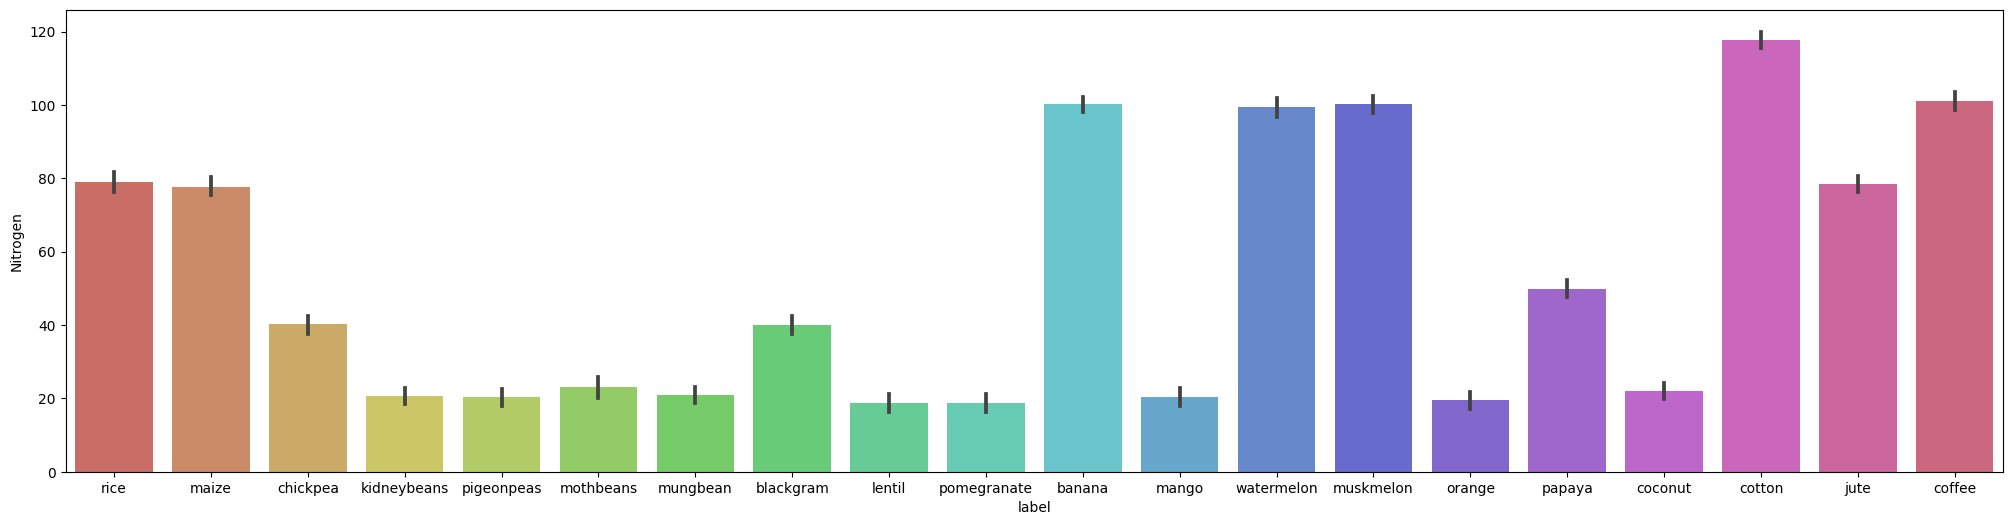

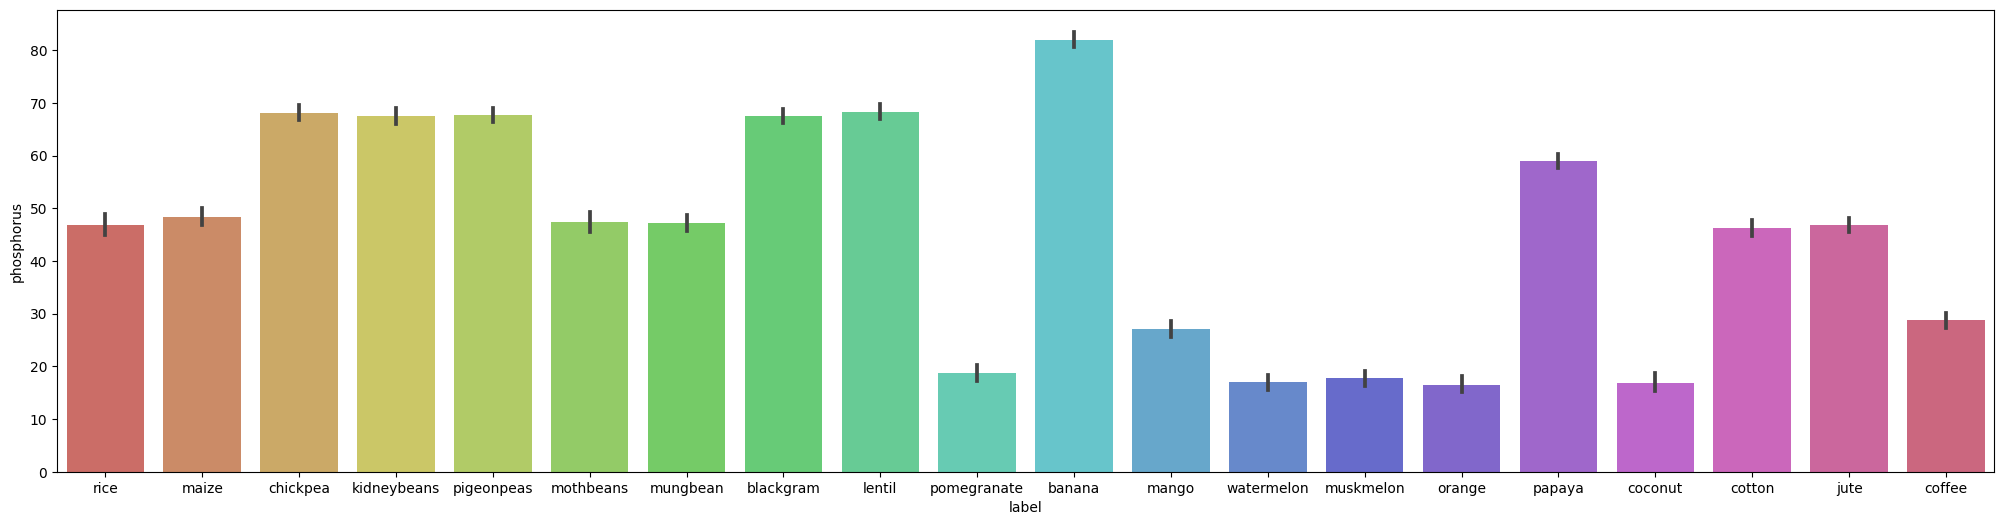

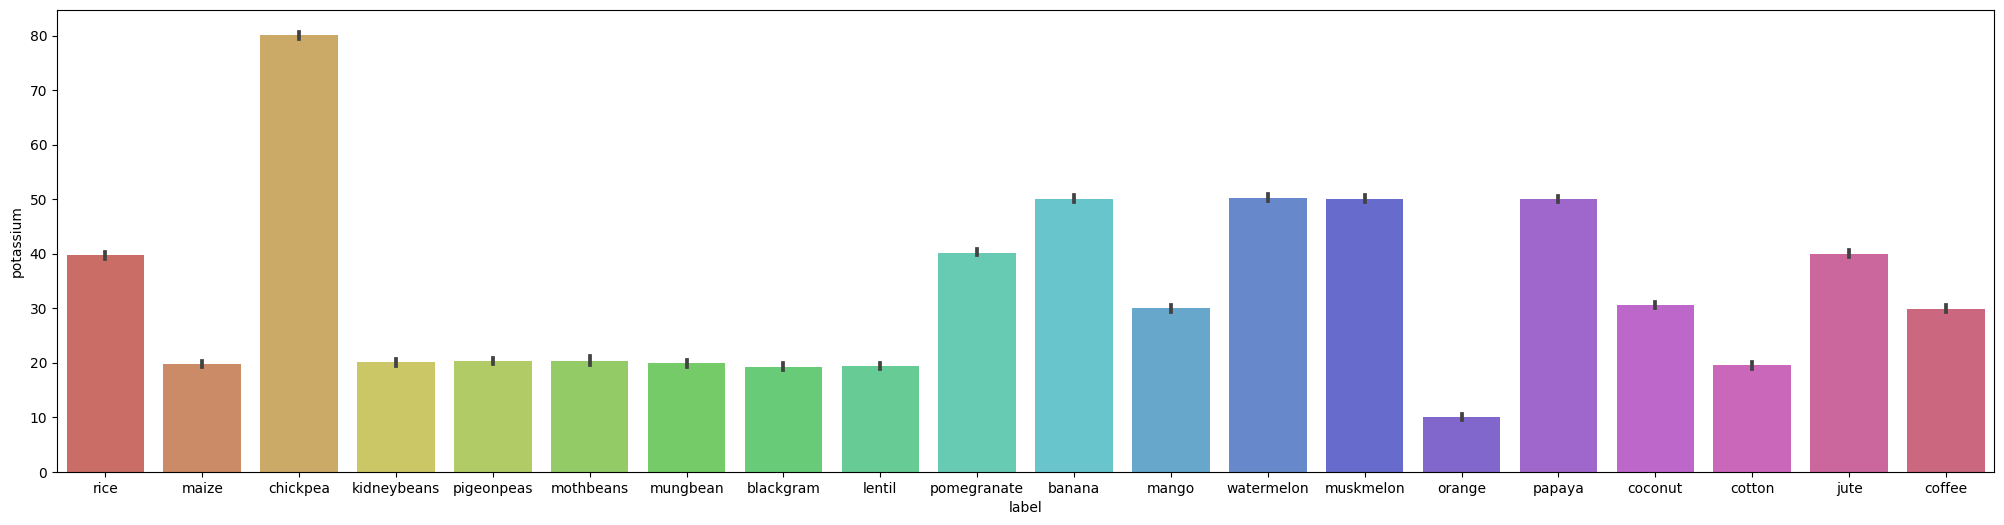

In [26]:
plt.figure(figsize=(25,6))
sns.barplot(y='Nitrogen',x='label',data=data,palette='hls')
plt.show

plt.figure(figsize=(25,6))
sns.barplot(y='phosphorus',x='label',data=data,palette='hls')
plt.show

plt.figure(figsize=(25,6))
sns.barplot(y='potassium',x='label',data=data,palette='hls')
plt.show



In [27]:
# Lets check the summary for all the crops

print("Average Ratio of Nitrogen in the soil: {0:.2f}".format(data['Nitrogen'].mean()))
print("Average Ratio of Phosphorous in the soil: {0:.2f}".format(data['phosphorus'].mean()))
print("Average Ratio of Potassium in the soil: {0:.2f}".format(data['potassium'].mean()))
print("Average Temperature in Celsius: {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH value of the soil: {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))


Average Ratio of Nitrogen in the soil: 53.86
Average Ratio of Phosphorous in the soil: 45.08
Average Ratio of Potassium in the soil: 32.86
Average Temperature in Celsius: 25.87
Average Relative Humidity in % : 70.47
Average PH value of the soil: 6.51
Average Rainfall in mm : 102.77


In [28]:
#let check the summary for each of the crop

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("------------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen Required: ",x['Nitrogen'].min())
    print("Average Nitrogen Required: ",x['Nitrogen'].mean())
    print("Maximum Nitrogen Required: ",x['Nitrogen'].max())
    print("-----------------------------------------------")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus Required: ",x['phosphorus'].min())
    print("Average Phosphorus Required: ",x['phosphorus'].mean())
    print("Maximum Phosphorus Required: ",x['phosphorus'].max())
    print("-----------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Potassium Required: ",x['potassium'].min())
    print("Average Potassium Required: ",x['potassium'].mean())
    print("Maximum Potassium Required: ",x['potassium'].max())
    print("-----------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature Required: ",x['temperature'].min())
    print("Average Temperature Required: ",x['temperature'].mean())
    print("Maximum Temperature Required: ",x['temperature'].max())
    print("-----------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity Required: ",x['humidity'].min())
    print("Average Humidity Required: ",x['humidity'].mean())
    print("Maximum Humidity Required: ",x['humidity'].max())
    print("-----------------------------------------------")
    print("Statistics for Ph")
    print("Minimum Ph Required: ",x['ph'].min())
    print("Average Ph Required: ",x['ph'].mean())
    print("Maximum Ph Required: ",x['ph'].max())
    print("-----------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall Required: ",x['rainfall'].min())
    print("Average Rainfall Required: ",x['rainfall'].mean())
    print("Maximum Rainfall Required: ",x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('banana', 'maize', 'jute', 'cotton', 'coconut', '…

In [29]:
# Lets compare the average requirement for each crops with average conditions

@interact
def compare(conditions=['Nitrogen','phosphorus','potassium', 'temperature','ph','humidity','rainfall']):
    print("Average value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
    print("-----------------------------------------------------------------------")
    print("Rice: {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams: {0:.2f}".format(data[(data['label'] == 'blackgram')][conditions].mean()))
    print("Banana: {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute: {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean()))
    print("Coconut: {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple: {0:.2f}".format(data[(data['label'] == 'apple')][conditions].mean()))
    print("Papaya: {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon: {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes: {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Bean: {0:.2f}".format(data[(data['label'] == 'mungbean')][conditions].mean()))
    print("Oranges: {0:.2f}".format(data[(data['label'] == 'oranges')][conditions].mean()))
    print("Chick Peans: {0:.2f}".format(data[(data['label'] == 'chickpea')][conditions].mean()))
    print("Cotton: {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean()))
    print("Maize: {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Pigeon Peans: {0:.2f}".format(data[(data['label'] == 'pigeonpeans')][conditions].mean()))
    print("Mango: {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Watermelon: {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Maize: {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Coffee: {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Pomegranate: {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Moth beans: {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Lentils: {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    
    

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'phosphorus', 'potassium', 'temp…

In [30]:
# lets make this functions more intuitive

@interact
def compare(conditions = ["Nitrogen" , "phosphorus" ,"potassium","temperature","ph","humidity","rainfall"]):
    print("Crops which require greater than average", conditions,'\n')
    print("---------------------------------------------------------")
    print("Crops which require less than average",conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'phosphorus', 'potassium', 'temp…

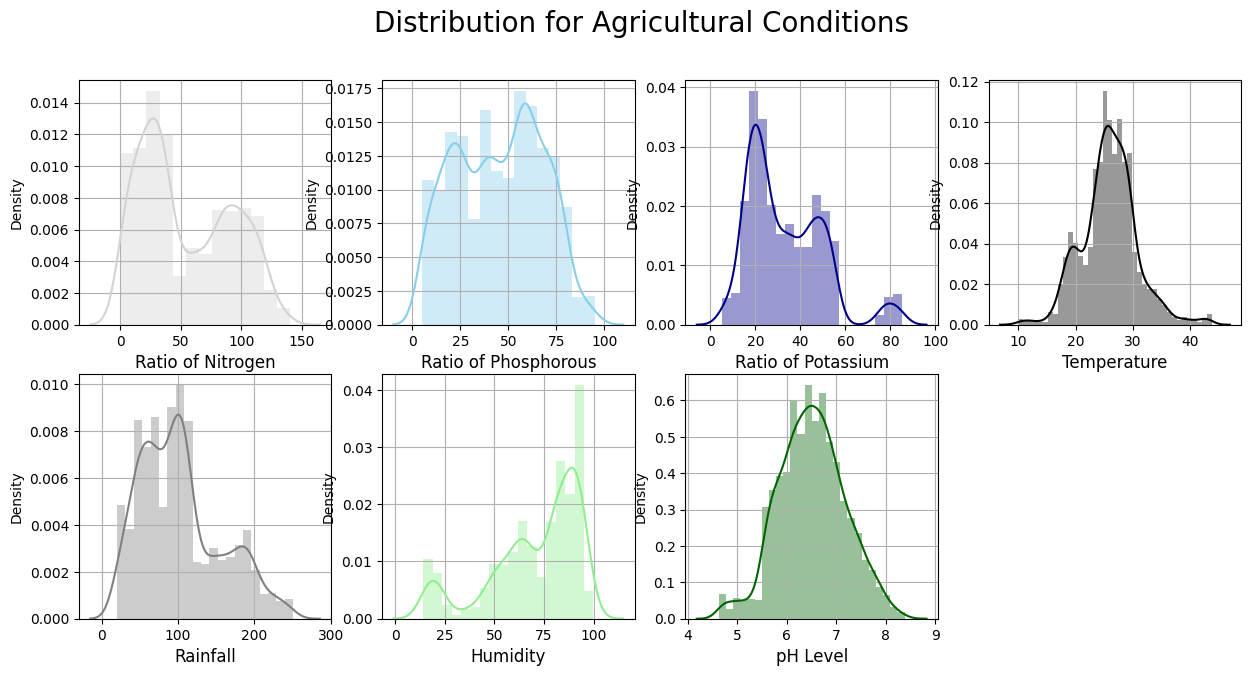

In [31]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(data['Nitrogen'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['phosphorus'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['potassium'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [32]:
## Lets find out some intresting facts

print("Some Intresting Patterns")
print("---------------------------")
print("Crops which requires very High ratio of Nitrogen content in soil: ",data[data['Nitrogen'] > 120]['label'].unique())
print("Crops which requires very High ratio of Phosphorous content in soil: ",data[data['phosphorus'] > 100]['label'].unique())
print("Crops which requires very High ratio of Potassium content in soil: ",data[data['potassium'] > 200]['label'].unique())
print("Crops which requires very High Rainfall: ",data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature: ",data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature: ",data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very low humidity: ",data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very low pH: ",data[data['ph'] < 4]['label'].unique())
print("Crops which requires very high pH: ",data[data['ph'] > 9]['label'].unique())

Some Intresting Patterns
---------------------------
Crops which requires very High ratio of Nitrogen content in soil:  ['cotton']
Crops which requires very High ratio of Phosphorous content in soil:  []
Crops which requires very High ratio of Potassium content in soil:  []
Crops which requires very High Rainfall:  ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature:  []
Crops which requires very High Temperature:  ['papaya']
Crops which requires very low humidity:  ['chickpea' 'kidneybeans']
Crops which requires very low pH:  []
Crops which requires very high pH:  []


In [33]:
## Lets understand which crop can only be grown in Summer season, Winter season and Rainy Season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity']>50)]['label'].unique())
print("---------------------------------")

print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("---------------------------------")

print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] >  30)]['label'].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'orange' 'papaya']
---------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'orange']
---------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [34]:
## Now we are using k-Means Clustering analysis

In [35]:
from sklearn.cluster import KMeans

#Removing the label column
x = data.drop(['label'],axis =1)

# Selecting all values of data
x = x.values

#checking the shape
print(x.shape)

(1901, 7)


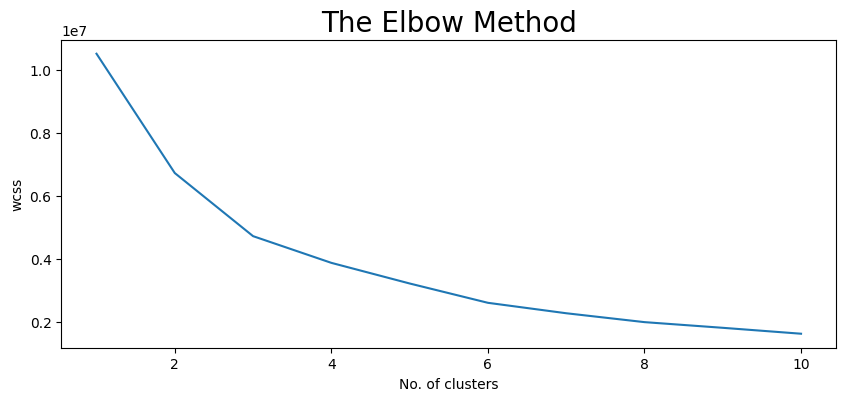

In [36]:
## lets determine the otimum number of clusters within the dataset

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
## Lets plot the result
plt.plot(range(1,11) , wcss)
plt.title("The Elbow Method" , fontsize = 20)
plt.xlabel("No. of clusters")
plt.ylabel('wcss')
plt.show()

In [37]:
#lets implement k means algorithm to perform clustering analysis

km = KMeans(n_clusters = 4 , init = "k-means++" , max_iter =300 , n_init = 10 , random_state =0)
y_means = km.fit_predict(x)

# Lets find out the result
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means,a],axis = 1)
z = z.rename(columns = {0:'cluster'})

## lets check the cluster of neach crop
print("Lets check the result after applying the k means clustering Analysis \n")
print("Crop in First Cluster: ",z[z['cluster'] == 0]['label'].unique())
print("--------------------------------------------------------------")
print("Crop in Second Cluster: ",z[z['cluster'] == 1]['label'].unique())
print("--------------------------------------------------------------")
print("Crop in Third Cluster: ",z[z['cluster'] == 2]['label'].unique())
print("--------------------------------------------------------------")
print("Crop in Forth Cluster: ",z[z['cluster'] == 3]['label'].unique())

Lets check the result after applying the k means clustering Analysis 

Crop in First Cluster:  [nan 'rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'banana' 'muskmelon']
--------------------------------------------------------------
Crop in Second Cluster:  [nan 'rice' 'maize' 'pomegranate' 'banana' 'mango' 'watermelon'
 'muskmelon' 'orange' 'papaya' 'coconut']
--------------------------------------------------------------
Crop in Third Cluster:  ['rice' nan 'kidneybeans' 'pigeonpeas' 'muskmelon' 'orange' 'papaya'
 'coconut' 'cotton']
--------------------------------------------------------------
Crop in Forth Cluster:  ['rice' nan 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'lentil'
 'pomegranate' 'banana' 'mango' 'watermelon' 'muskmelon']


In [38]:
# Lets split the dataset for predictive Modelling

y = data['label']
x = data.drop(['label'],axis = 1)

print("Shape of x:" , x.shape)
print("Shape of y:" , y.shape)

Shape of x: (1901, 7)
Shape of y: (1901,)


In [39]:
## Lets create Training and Testing sets for validation of results

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size =0.2 , random_state = 0)

print("The Shape of x train: ",x_train.shape)
print("The Shape of x test: ",x_test.shape)
print("The Shape of y train: ",y_train.shape)
print("The Shape of y test: ",y_test.shape)

The Shape of x train:  (1520, 7)
The Shape of x test:  (381, 7)
The Shape of y train:  (1520,)
The Shape of y test:  (381,)


In [40]:
# lets create a Predictive model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

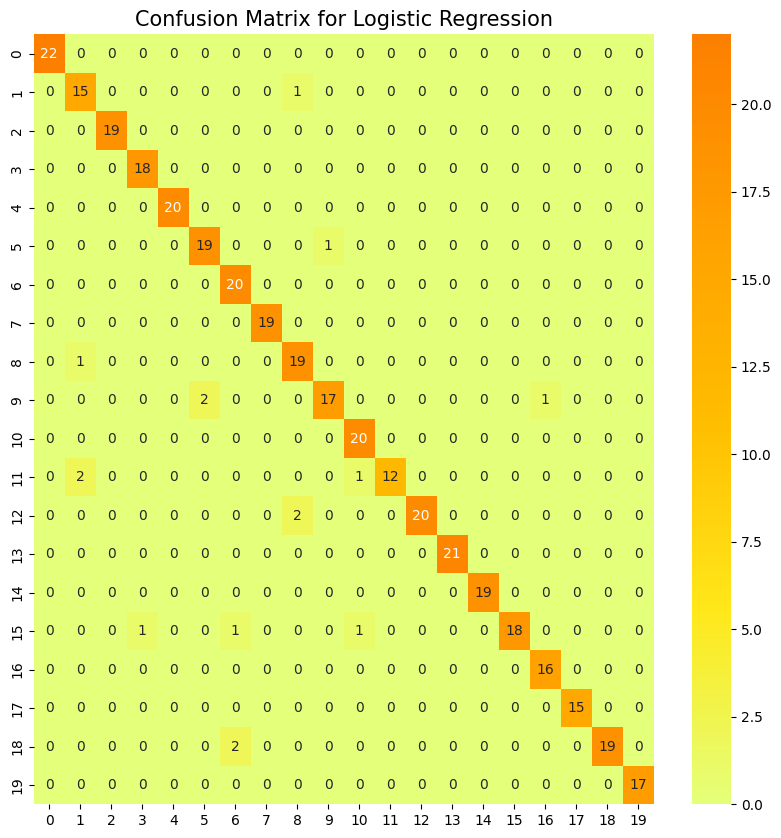

In [41]:
## Lets evaluate the model performance

from sklearn.metrics import confusion_matrix

#lets print the confusion matrix first
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True , cmap = "Wistia")
plt.title('Confusion Matrix for Logistic Regression' , fontsize = 15)
plt.show()

In [42]:
# lets print the classification report also

#cr = classification_report(y_test,y_pred)
#print(cr)

In [43]:
#lets check the head of the dataset
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice


In [44]:
prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The suggested crop for given climatic conditions are: ",prediction)

The suggested crop for given climatic conditions are:  ['rice']
